# 주가 데이터 분석
- 어제 종가 데이터로 오늘의 종가를 예측

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer

In [21]:
# 시작 날짜와 종료날짜 입력
start_date = '2023-03-01'
end_date = '2023-08-01'

In [22]:
# 대한민국의 삼성전자 종목 번호
stock_number = '005930'

In [23]:
# 야후 파이낸스를 사용하여 주가 정보 가져오기
data = yf.download(stock_number+'.KS', start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [24]:
# 어제의 종가를 'Close_yesterday' 열로 추가
data['Close_yesterday'] = data['Close'].shift(1)

In [25]:
# 오늘의 종가를 'Close_today' 열로 추가
data['Close_today'] = data['Close']

In [26]:
# 데이터 확인
data # Close_yesterday 첫 행에 결측치 존재

,Open,High,Low,Close,Adj Close,Volume,Close_yesterday,Close_today
Date,,,,,,,,
2023-03-02,60900.0,61800.0,60500.0,60800.0,60149.769531,13095682,NaN,60800.0
2023-03-03,61000.0,61200.0,60500.0,60500.0,59852.980469,10711405,60800.0,60500.0
2023-03-06,61100.0,61600.0,60800.0,61500.0,60842.285156,13630602,60500.0,61500.0
2023-03-07,61400.0,61400.0,60700.0,60700.0,60050.839844,11473280,61500.0,60700.0
2023-03-08,60100.0,60500.0,59900.0,60300.0,59655.117188,14161857,60700.0,60300.0
...,...,...,...,...,...,...,...,...
2023-07-25,70000.0,70500.0,69800.0,70000.0,70000.000000,14314945,70400.0,70000.0
2023-07-26,69800.0,70600.0,68100.0,69800.0,69800.000000,30016221,70000.0,69800.0
2023-07-27,69900.0,71700.0,69300.0,71700.0,71700.000000,24261179,69800.0,71700.0


In [27]:
# 어제 종가 입력
input_price = float('69800.0')

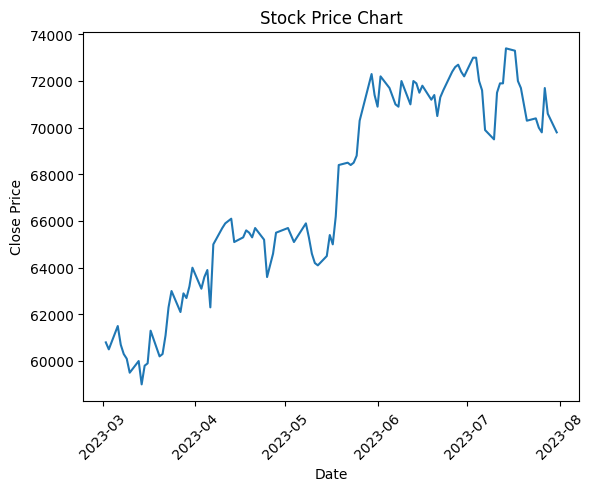

In [28]:
# 주가 데이터 시각화
plt.plot(data.index, data['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Price Chart')
plt.xticks(rotation=45)
plt.show()

In [29]:
# 결측치 대체
imputer = SimpleImputer(strategy='mean')
X = data[['Close_yesterday']]
y = data['Close_today']
X_imputed = imputer.fit_transform(X)

In [30]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

## 선형 회귀모형 사용

In [31]:
# 선형 회귀모형으로 미래의 주가 예측
# 실제 8/1 주가 : 71100원
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
prediction_linear = linear_model.predict([[input_price]])

In [32]:
# 선형 회귀모형의 정확도 계산
y_train_pred_linear = linear_model.predict(X_train)
y_test_pred_linear = linear_model.predict(X_test)
train_accuracy_linear = r2_score(y_train, y_train_pred_linear)
test_accuracy_linear = r2_score(y_test, y_test_pred_linear)

In [33]:
print("선형 회귀모형 예측 결과:", prediction_linear)
print("선형 회귀모형의 훈련 세트 정확도:", train_accuracy_linear)
print("선형 회귀모형의 테스트 세트 정확도:", test_accuracy_linear)

선형 회귀모형 예측 결과: [69829.99296487]
선형 회귀모형의 훈련 세트 정확도: 0.9609510921500328
선형 회귀모형의 테스트 세트 정확도: 0.8669184845879208


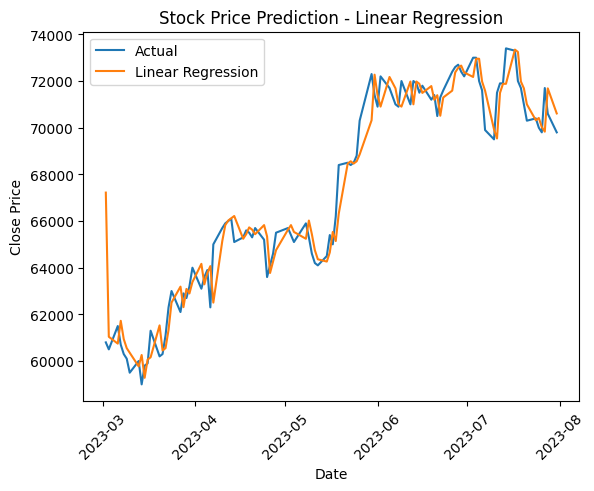

In [34]:
# 선형 회귀모형의 예측치 시각화
plt.plot(data.index, data['Close'], label='Actual')
plt.plot(data.index, linear_model.predict(X_imputed), label='Linear Regression')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Price Prediction - Linear Regression')
plt.legend()
plt.xticks(rotation=45)
plt.show()

## 비선형 회귀모형 사용

In [35]:
# 비선형 회귀모형으로 미래의 주가 예측
# 실제 8/1 주가 : 71100원
nonlinear_model = SVR(kernel='rbf')
nonlinear_model.fit(X_train, y_train)
prediction_nonlinear = nonlinear_model.predict([[input_price]])

In [36]:
# 비선형 회귀모형의 정확도 계산
y_train_pred_nonlinear = nonlinear_model.predict(X_train)
y_test_pred_nonlinear = nonlinear_model.predict(X_test)
train_accuracy_nonlinear = r2_score(y_train, y_train_pred_nonlinear)
test_accuracy_nonlinear = r2_score(y_test, y_test_pred_nonlinear)

In [37]:
print("비선형 회귀모형 예측 결과:", prediction_nonlinear)
print("비선형 회귀모형의 훈련 세트 정확도:", train_accuracy_nonlinear)
print("비선형 회귀모형의 테스트 세트 정확도:", test_accuracy_nonlinear)

비선형 회귀모형 예측 결과: [66042.77393279]
비선형 회귀모형의 훈련 세트 정확도: -0.06480123492431278
비선형 회귀모형의 테스트 세트 정확도: -0.03599638933938909


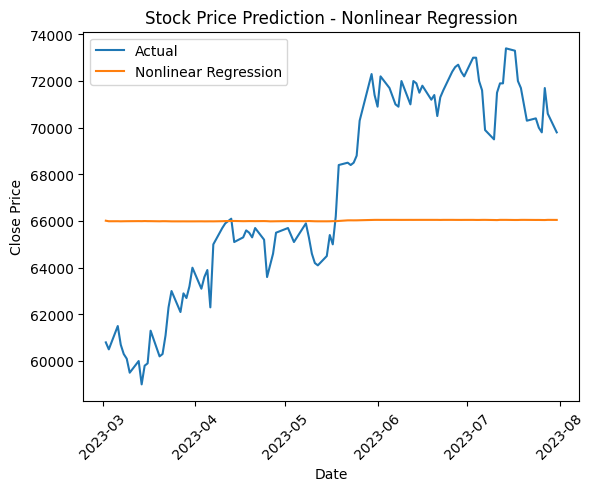

In [38]:
# 비선형 회귀모형의 예측치 시각화
plt.plot(data.index, data['Close'], label='Actual')
plt.plot(data.index, nonlinear_model.predict(X_imputed), label='Nonlinear Regression')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Price Prediction - Nonlinear Regression')
plt.legend()
plt.xticks(rotation=45)
plt.show()

## 근접 회귀모형 사용

In [39]:
# 근접 회귀모형으로 미래의 주가 예측
# 실제 8/1 주가 : 71100원
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
prediction_knn = knn_model.predict([[input_price]])

In [40]:
# 근접 회귀모형의 정확도 계산
y_train_pred_knn = knn_model.predict(X_train)
y_test_pred_knn = knn_model.predict(X_test)
train_accuracy_knn = r2_score(y_train, y_train_pred_knn)
test_accuracy_knn = r2_score(y_test, y_test_pred_knn)

In [41]:
print("근접 회귀모형 예측 결과:", prediction_knn)
print("근접 회귀모형의 훈련 세트 정확도:", train_accuracy_knn)
print("근접 회귀모형의 테스트 세트 정확도:", test_accuracy_knn)

근접 회귀모형 예측 결과: [71060.]
근접 회귀모형의 훈련 세트 정확도: 0.9680766625146179
근접 회귀모형의 테스트 세트 정확도: 0.8543672667484115


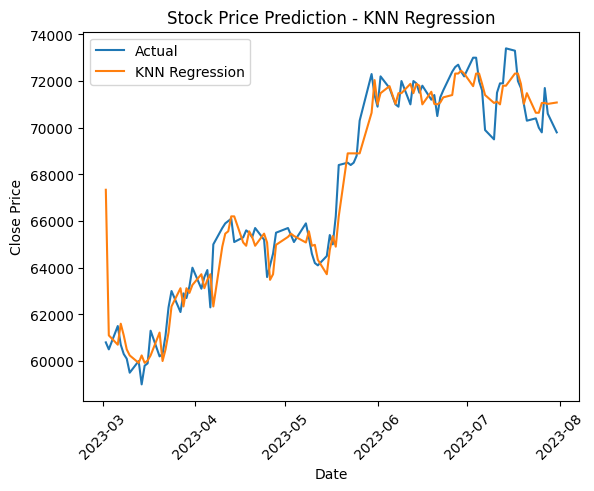

In [42]:
# 근접 회귀모형의 예측치 시각화
plt.plot(data.index, data['Close'], label='Actual')
plt.plot(data.index, knn_model.predict(X_imputed), label='KNN Regression')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Price Prediction - KNN Regression')
plt.legend()
plt.xticks(rotation=45)
plt.show()

## 삼성전자 vs 미국금리

In [43]:
# pip install finance-datareader
# pip install fredapi
import FinanceDataReader as fdr
from fredapi import Fred
import pandas as pd

In [44]:
# 1. 주가 불러오기
start_date = '2017-11-09'
end_date = '2023-07-28'
stock_code = '005930'
samsung_data = fdr.DataReader(stock_code, start_date, end_date)

In [45]:
# 2. 기간의 구분
phase1_start = '2017-11-09'
phase1_end = '2019-07-31'
phase2_start = '2019-07-31'
phase2_end = '2020-03-15'
phase3_start = '2020-03-15'
phase3_end = '2022-03-17'
phase4_start = '2022-03-17'
phase4_end = '2023-07-28'

In [46]:
# 3. 날짜 구간을 가져옴
phase1_data = samsung_data.loc[phase1_start:phase1_end]
phase2_data = samsung_data.loc[phase2_start:phase2_end]
phase3_data = samsung_data.loc[phase3_start:phase3_end]
phase4_data = samsung_data.loc[phase4_start:phase4_end]

In [48]:
# 4. 기준금리의 데이터를 가져옴
fred = Fred(api_key='b2182a80ba352b4be7486642fe6444c7')
interest_rate_data = fred.get_series('DFF', start_date="2017-11-09", end_date="2023-07-28")

In [49]:
# 5. 주가를 3의 구간으로 나눔
phase1_data.index = pd.to_datetime(phase1_data.index)
phase2_data.index = pd.to_datetime(phase2_data.index)
phase3_data.index = pd.to_datetime(phase3_data.index)
phase4_data.index = pd.to_datetime(phase4_data.index)
interest_rate_data.index = pd.to_datetime(interest_rate_data.index)

In [50]:
# 6. 각 영역에 대한 색깔을 지정
colors = ['blue', 'orange', 'green', 'red']

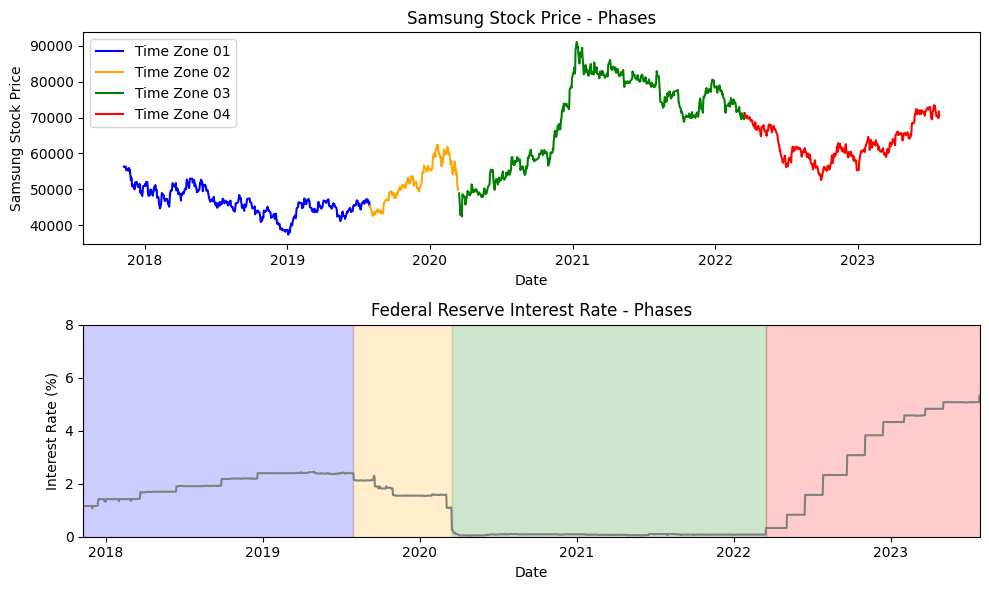

In [58]:
# 7. 불러온 데이터를 "차트"에 입력
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(phase1_data.index, phase1_data['Close'], label='Time Zone 01', color=colors[0])
plt.plot(phase2_data.index, phase2_data['Close'], label='Time Zone 02', color=colors[1])
plt.plot(phase3_data.index, phase3_data['Close'], label='Time Zone 03', color=colors[2])
plt.plot(phase4_data.index, phase4_data['Close'], label='Time Zone 04', color=colors[3])
plt.xlabel("Date")
plt.ylabel("Samsung Stock Price")
plt.title("Samsung Stock Price - Phases")
plt.legend()

# 8. 기준금리 데이터도 위와 같이 진행
plt.subplot(2, 1, 2)
plt.plot(interest_rate_data.index, interest_rate_data, color='gray')
plt.xlabel("Date")
plt.ylabel("Interest Rate (%)")
plt.title("Federal Reserve Interest Rate - Phases")
plt.xlim(pd.to_datetime("2017-11-09"), pd.to_datetime("2023-07-28"))
plt.ylim(0, 8)

# 각 단계에 배경색 지정
plt.axvspan(phase1_data.index[0], phase1_data.index[-1], color=colors[0], alpha=0.2)
plt.axvspan(phase2_data.index[0], phase2_data.index[-1], color=colors[1], alpha=0.2)
plt.axvspan(phase3_data.index[0], phase3_data.index[-1], color=colors[2], alpha=0.2)
plt.axvspan(phase4_data.index[0], phase4_data.index[-1], color=colors[3], alpha=0.2)

plt.tight_layout()
plt.show()